In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [20]:
plt.rcParams['figure.figsize'] = [15, 10]

In [21]:
FILE_NUMBER = 0 # file you want to plot

# two axis you want to plot [0,1,2] -> [x,y,z]
AXIS1 = 0 
AXIS2 = 1

In [22]:
# get all file under prediction folder
file_list = glob.glob("./prediction/*.npz")
file = file_list[FILE_NUMBER]

In [4]:
f = np.load(file)
node_list = f['x']
edge_index = f['edge_index']
ip_gt = np.squeeze(f['ip_gt']) 
ip_pred = np.squeeze(f['ip_pred'])

In [5]:
edge_index.shape

(2, 19)

In [26]:
def draw_sample(axis1, axis2, node_list, edge_index, ip_gt, ip_pred):
    
    # cylinder to cartesian coordinate transformation
    x = node_list[:,0] * np.cos(node_list[:,1])
    y = node_list[:,0] * np.sin(node_list[:,1])
    z = node_list[:,2]
    
    gt_x = ip_gt[0] * np.cos(ip_gt[1])
    gt_y = ip_gt[0] * np.sin(ip_gt[1])
    gt_z = ip_gt[2]
    
    pred_x = ip_pred[0] * np.cos(ip_pred[1])
    pred_y = ip_pred[0] * np.sin(ip_pred[1])
    pred_z = ip_pred[2]
    
    node_position = [x,y,z]
    gt_position = [gt_x, gt_y, gt_z]
    pred_position = [pred_x, pred_y, pred_z]
    
    fig, ax0 = plt.subplots()
    
    # plot node and ground truth/predict ip
    ax0.scatter(node_position[axis1], node_position[axis2], s=10, c='k', label='hits')
    ax0.scatter(gt_position[axis1], gt_position[axis2], s=100, c='r', label='true IP')
    ax0.scatter(pred_position[axis1], pred_position[axis2], s=100, c='b', label='predicted IP')
    
    # plot all track
    for i in range(edge_index.shape[1]):
        ax0.plot([node_position[axis1][edge_index[0,i]],node_position[axis1][edge_index[1,i]]],
                 [node_position[axis2][edge_index[0,i]],node_position[axis2][edge_index[1,i]]], '-', c='k')
    
    plt.legend()
    plt.savefig('ip_comparsion.pdf')
    plt.show()

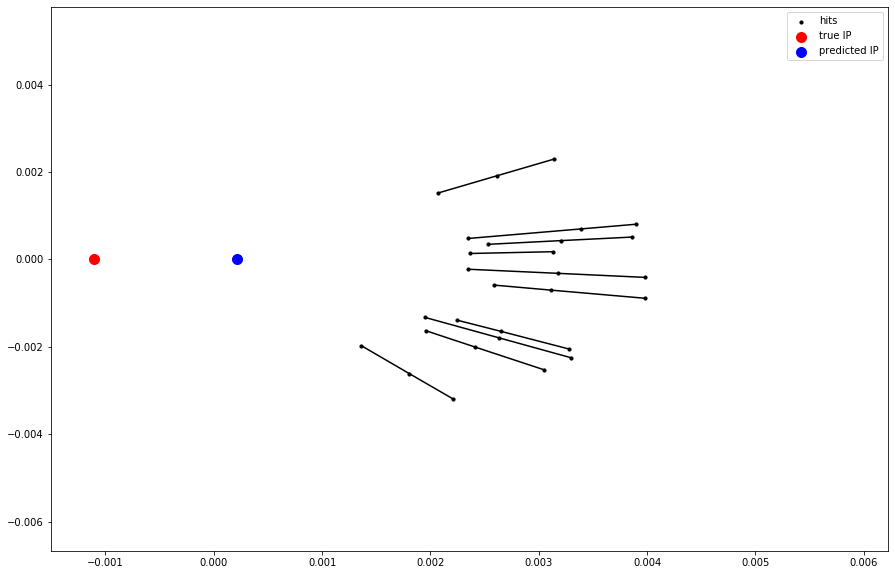

In [27]:
draw_sample(AXIS1, AXIS2, node_list, edge_index, ip_gt, ip_pred)